In [1]:
from modules.client import OffVarianceClient
import modules.utils as utils
from dotenv import dotenv_values
import pandas

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

In [2]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win1'] >= 1.8) & (games_df['odds_open_win1'] <= 2.8) &
(games_df['odds_open_tm25'] >= 2.0) & (games_df['odds_open_tm25'] <= 2.5)
]

Count: 5402
Open profit: -152.27000000000004
Close profit: -145.79000000000002
Open ROI: -0.028187708256201413
Close ROI: -0.026988152536097744
UDI: -0.0014138471381909504
AxesSubplot(0.125,0.125;0.775x0.755)


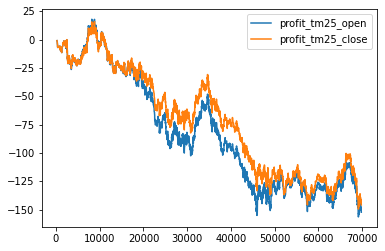

In [3]:
utils.print_total_under_result(segmented_df)

Count: 209
Open profit: 31.769999999999996
Close profit: 16.269999999999992
Open ROI: 0.1520095693779904
Close ROI: 0.07784688995215307
UDI: 0.07381173904977906
AxesSubplot(0.125,0.125;0.775x0.755)


,value,condition
expected_total,2.038429,<=
expected_total_loc,1.913853,<=


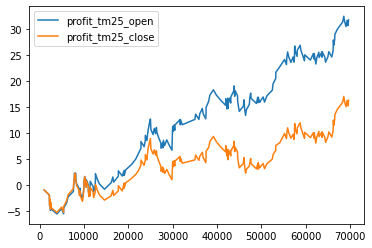

In [4]:
result = utils.create_strategy_by_udi(segmented_df, utils.metrics, 'udi_tm25')
utils.print_total_under_result(result.games_df)
result.metrics_df

Count: 34
Open profit: 10.330000000000002
Close profit: 6.15
Open ROI: 0.30382352941176477
Close ROI: 0.1808823529411765
UDI: 0.09867771168633943
AxesSubplot(0.125,0.125;0.775x0.755)


,value,condition
expected_total,1.797681,<=
expected_total_loc,1.574293,<=


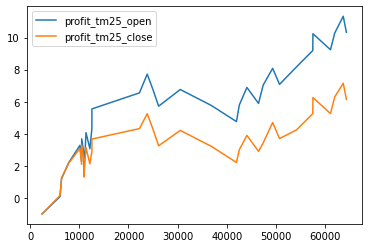

In [5]:
result = utils.create_strategy_by_udi(segmented_df, utils.metrics, 'udi_tm25', iterations=3)
utils.print_total_under_result(result.games_df)
result.metrics_df